In [2]:
import numpy as np
import ddfa_node
from ddfa_node import sample_floquet_multipliers, backtrace_multipliers_all
import matplotlib.pyplot as plt

# load reload extension:
%load_ext autoreload
%autoreload 2

In [3]:
generated_data = np.load("outputs/gen_vdp_data.npy")
print(generated_data.shape)

(100, 2000, 7)


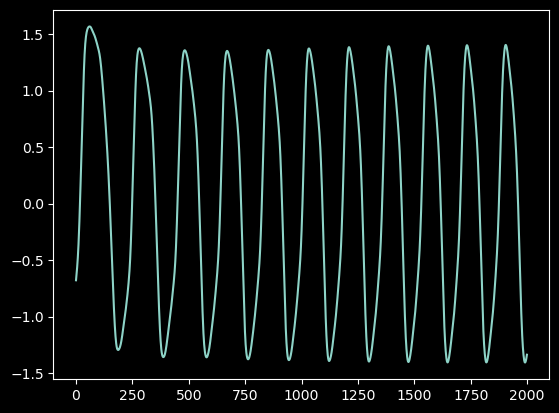

In [4]:
plt.plot(generated_data[0, :, 0])


In [5]:
splits = range(2, 5)
allEigenvals, allEigenvecs, allRs, allPhis, Ns = sample_floquet_multipliers(
    generated_data,
    nSegments=20, 
    nCovReps=1, 
    phaser_feats=None, 
    splits=splits, 
    nReplicates=300, 
    usePCA=False, 
    height=0.85, 
    distance=60, 
    vecs=False)

  0%|          | 0/100 [00:00<?, ?it/s]/mnt/Mouse_Face_Project/Desktop/Data/Python/NeuralODE/.pixi/envs/default/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/mnt/Mouse_Face_Project/Desktop/Data/Python/NeuralODE/.pixi/envs/default/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/mnt/Mouse_Face_Project/Desktop/Data/Python/NeuralODE/.pixi/envs/default/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/mnt/Mouse_Face_Project/Desktop/Data/Python/NeuralODE/.pixi/envs/default/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide

In [1]:
estimates, estimates_stderr = backtrace_multipliers_all(allEigenvals, Ns, splits)

plt.plot(estimates[:, 10, :])

NameError: name 'backtrace_multipliers_all' is not defined

Error for subject 0, phase 0, eig 0
Error for subject 0, phase 0, eig 1
Error for subject 0, phase 1, eig 0
Error for subject 0, phase 1, eig 1
Error for subject 0, phase 2, eig 0
Error for subject 0, phase 2, eig 1
Error for subject 0, phase 3, eig 0
Error for subject 0, phase 3, eig 1
Error for subject 0, phase 4, eig 0
Error for subject 0, phase 4, eig 1
Error for subject 0, phase 5, eig 0
Error for subject 0, phase 5, eig 1
Error for subject 0, phase 6, eig 0
Error for subject 0, phase 6, eig 1
Error for subject 0, phase 7, eig 0
Error for subject 0, phase 7, eig 1
Error for subject 0, phase 8, eig 0
Error for subject 0, phase 8, eig 1
Error for subject 0, phase 9, eig 0
Error for subject 0, phase 9, eig 1
Error for subject 0, phase 10, eig 0
Error for subject 0, phase 10, eig 1
Error for subject 0, phase 11, eig 0
Error for subject 0, phase 11, eig 1
Error for subject 0, phase 12, eig 0
Error for subject 0, phase 12, eig 1
Error for subject 0, phase 13, eig 0
Error for subject 0, 

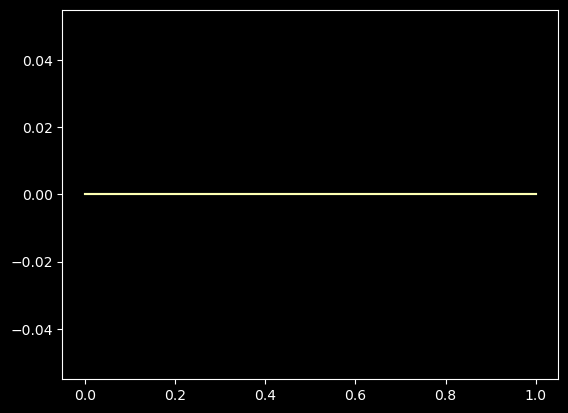

In [34]:
nPoints = 4
n_subjects, _, _, _, n_phases, _, n_eigs = allEigenvals.shape
estimates = np.zeros((n_subjects, n_phases, n_eigs))
estimates_stderr = np.zeros((n_subjects, n_phases, n_eigs))
for subject in range(n_subjects):
    for phase in range(n_phases):
        for eig in range(n_eigs):
            try:    
                est = backtrace_multipliers(splits, allEigenvals, Ns, subject=subject, nPoints=nPoints, phase=phase, eig=eig, plot=False, plot_title=None, ax=None)
                estimates[subject, phase, eig] = est[0]
                estimates_stderr[subject, phase, eig] = est[1]
            except:
                print(f"Error for subject {subject}, phase {phase}, eig {eig}")
plt.plot(estimates[0, 10, :])
plt.plot(estimates_stderr[0, 10, :])